In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df["InternetService"] = df["InternetService"].fillna("")

In [7]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [10]:
numeric_columns_data = df.select_dtypes(include="number")

In [11]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
import matplotlib.pyplot as plt

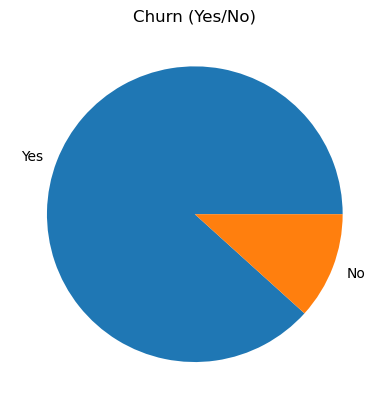

In [13]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [14]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [15]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [17]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At the lower terms we can see that the monthly charge average decreases

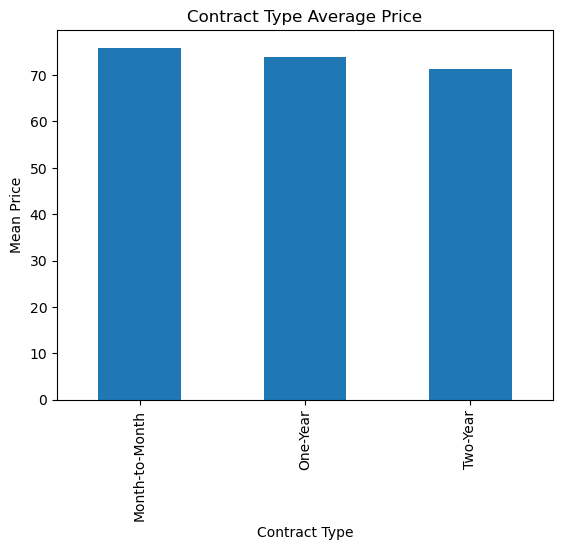

In [18]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.title("Contract Type Average Price")
plt.show()

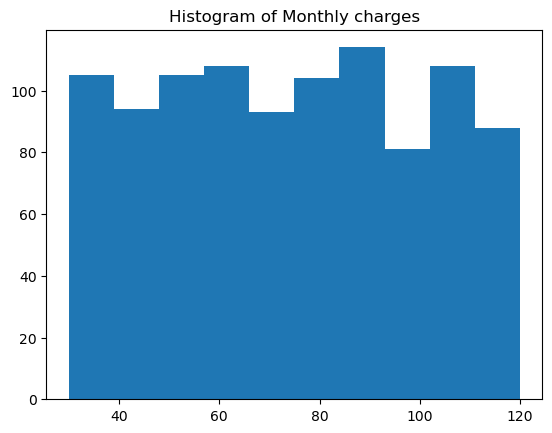

In [19]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly charges")
plt.show()

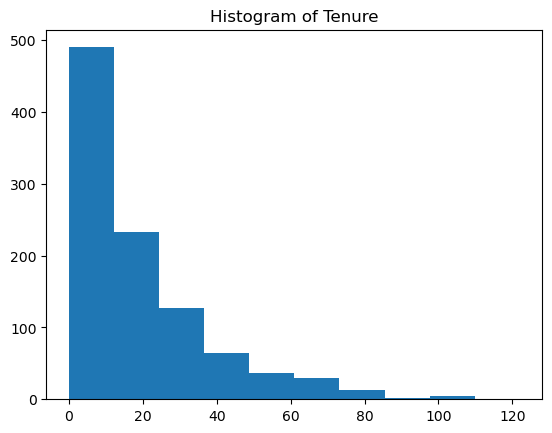

In [20]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [21]:
X=df[["Age","Gender","Tenure","MonthlyCharges"]]
y=df[["Churn"]]

In [22]:
X["Gender"] = X["Gender"].apply(lambda x:1 if x=="Female" else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\229256586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [23]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [24]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [25]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\3104515624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)


In [26]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [33]:
X_test = scaler.fit_transform(X_test)

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [36]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Churn
1        708
0         92
Name: count, dtype: int64
After SMOTE: Churn
0        708
1        708
Name: count, dtype: int64


In [37]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression()

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
log_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [43]:
y_pred = log_model.predict(X_test)

In [44]:
y_test

,Churn
766,0
402,1
141,1
455,1
182,1
...,...
607,1
657,0
430,1
650,0


In [45]:
modelperformance(y_pred)

Accuracy score on model is 0.655


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform","distance"],
}

In [48]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [49]:
gridkn.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [50]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [51]:
y_pred = gridkn.predict(X_test)

In [52]:
modelperformance(y_pred)

Accuracy score on model is 0.745


In [53]:
from sklearn.svm import SVC

In [54]:
svm = SVC()

In [55]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear","rbf","poly"]
}

In [56]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [57]:
gridsvc.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [58]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [59]:
y_pred=gridsvc.predict(X_test)

In [60]:
modelperformance(y_pred)

Accuracy score on model is 0.695


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
param_grid = {
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth": [None,10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [63]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [64]:
grid_tree.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [65]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [66]:
y_pred = grid_tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [67]:
modelperformance(y_pred)

Accuracy score on model is 0.79


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [69]:
param_grid = {
    "n_estimators": [32,64,128,256],
    "max_features": [2,3,4],
    "bootstrap": [True,False]
}

In [70]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [71]:
grid_rfc.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [72]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128}

In [73]:
y_pred = grid_rfc.predict(X_test)

In [74]:
modelperformance(y_pred)

Accuracy score on model is 0.715


In [76]:
best_model = grid_tree.best_estimator_

In [77]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [78]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')